In [76]:
#!pip install torch torchvision
import torch
from torch import nn
from torch import optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import numpy as np
from matplotlib import pyplot as plt

from IPython.display import Markdown

# PyTorch

PyTorch is an open source machine learning library based on the Torch library, used for applications such as computer vision and natural language processing, primarily developed by Facebook's AI Research lab. It is free and open-source software released under the Modified BSD license

## PyTorch Tensors
Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs ($x$) and outputs ($y$) of a model, as well as the model’s parameters (weights).

Tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs or other hardware accelerators. In fact, tensors and NumPy arrays can often share the same underlying memory, eliminating the need to copy data. 

[Additional Reading](https://pytorch.org/tutorials/beginner/basics/tensor_tutorial.html)

In [4]:
a = np.array([[1,2],[3,4]])
t1 = torch.tensor(a)
t2 = torch.from_numpy(a)
t3 = torch.tensor([[1,2]])
print(t3.dtype)
t4 = torch.tensor([[2,3]], dtype=torch.float16)
print(t4.dtype)

t5 = torch.ones_like(t3)
print(t5)

torch.int64
torch.float16
tensor([[1, 1]])


## Pytorch AutoGrad

In [5]:
x = torch.tensor([2.0], requires_grad=True)
y = x ** 2 + 3 * x + 1
y.backward()
print(x.grad) # gradient of y w.r.t x at x=2

tensor([7.])


## Perceptron
Build a perceptron featuring three inputs and a single output. Initialize all weights ($𝑤_0$, $𝑤_2$, $𝑤_3$) to 1, considering a bias term. Take a training data point, 𝑥1=4, 𝑥2=-1, and 𝑦=1. Employ the backpropagation algorithm to demonstrate how this neural network evolves during the processing of the given training example. Set the learning rate (𝛼) to 0.5 and utilize the squared loss function.

In [6]:
x = torch.tensor([1., 4., -2.]) 
y = torch.tensor([1.]) 
w = torch.tensor([1., 1., 1.], requires_grad=True)
h = torch.matmul(w,x)           # 1. forward pass
print(f'Forward Pass, h= {h}')
J = (h-y)**2 # Squared loss
J.backward()                    # 2. backward pass
print(f'Backward pass, Derivatives= {w.grad}')
w = w - 0.5*w.grad # alpha is 0.5 here   #  3.  Update the weights
print(f'Weights update, w= {w}')

Forward Pass, h= 3.0
Backward pass, Derivatives= tensor([ 4., 16., -8.])
Weights update, w= tensor([-1., -7.,  5.], grad_fn=<SubBackward0>)


In [7]:
# Using PyTorch Optimizer
x = torch.tensor([[4., -2.]]) 
y = torch.tensor([[1.]]) 
h = nn.Linear(2, 1, bias=True) # h = w x + b
h.weight = nn.Parameter(torch.tensor([[1., 1.]]))  
h.bias = nn.Parameter(torch.tensor([[1.]]))  

optimizer = optim.SGD(h.parameters(), lr = .5) # gradient descent with learning rate lr
Cost = nn.MSELoss() # mean squared error

# one iteration of Backpropagation algo
optimizer.zero_grad()
out = h(x)
print(f'Forward Pass, h= {h}')
loss = Cost(out, y)
loss.backward()
print(f'Backward pass, Derivatives= {h.bias.grad} {h.weight.grad}')
optimizer.step()
print(f'Weights update, w= {h.bias.detach().numpy()} {h.weight.detach().numpy()}')

Forward Pass, h= Linear(in_features=2, out_features=1, bias=True)
Backward pass, Derivatives= tensor([[4.]]) tensor([[16., -8.]])
Weights update, w= [[-1.]] [[-7.  5.]]


## Linear Example

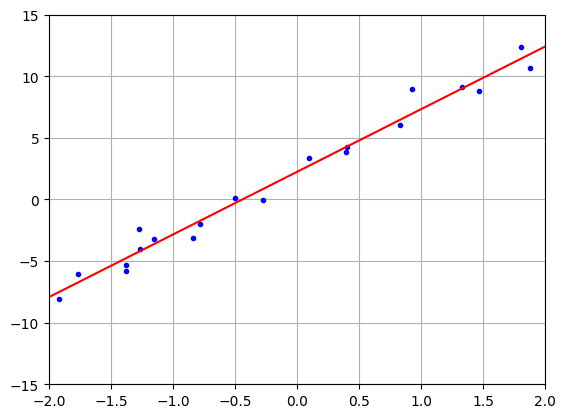

In [28]:
np.random.seed(42)
x_data = np.sort(-2. + 4. * np.random.rand(20))
y_data = 5. * x_data + 2.5 + np.random.randn(20)

X = torch.tensor(x_data[:,np.newaxis], dtype=torch.float32)
Y = torch.tensor(y_data[:,np.newaxis], dtype=torch.float32)

# Linear regression hypothesis using Pytorch
h = nn.Linear(1, 1, bias=True) # h = w x + b


optimizer = optim.SGD(h.parameters(), lr = .1) # stochastic gradient descent with learning rate lr
Cost = nn.MSELoss() # mean squared error

for i in range(50):
    optimizer.zero_grad()
    out = h(X)
    loss = Cost(out, Y)
    loss.backward()
    optimizer.step()

plt.plot(x_data, y_data, 'b.')
x = torch.tensor(np.linspace(-2.0, 2.0, 100).reshape(-1,1), dtype=torch.float32)
y = h(x).detach().numpy()
plt.plot(x,y,'r')
plt.ylim([-15, 15])
plt.xlim([-2, 2])
plt.grid('on')


## Non-Linear Example

We will design a 2-Hidden layers Neural Network to predict the following data